Exploratory data Analysis:
1. Analysis
- Univariate Analysis - single column
- Multivariate Analysis - more than one column

2.Feature Engineering
- Creating new columns/Features
- Modifying existing columns/Features
- Removing unwanted columns/Fetures

3.Handling Outliers
- Detect outliers
- Remove outliers

We will import the required Libraries:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Analytics Project/EDA - Pandas /Dataset/Titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# .info() will give the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# isnull() is used for checking the null values inside the dataframe.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# 687/891 values has been null so about 77% of the data is missing
# Its better to remove it.

df.drop(columns=['Cabin'], inplace=True)

In [27]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


In [28]:
# generally the age not indicated by the 29.69 indecimal points
# Instead we will use the median value for the missing values of Age.

df['Age'].fillna(value=df['Age'].median(), inplace=True)
# inplace=True is used for make the chnages permanant.

In [29]:
df['Embarked'].value_counts()
# here the S is most commonly used value hence we will use the value of S for the missing values in Embarked.

df['Embarked'].fillna(value='S',inplace=True)
# hence there are no more missing values.

In [30]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S


In the dataset:
- The Survived column gives us info that if passenger survived = 1 , and not survived = 0
- Ticket class = 1st=1, 2=2nd, 3rd=3
- Age in years
- Sibsp = no. of siblings / spouses aboard the Titanic
- parch = no. of parents/child aboard the Titanic
- Ticket = Ticket Number
- fare = Passenger fare
- Cabin = Exclusive rooms
- Embarked = Port of Embarkation

C = Chebourge
S = SouthHampten
Q = Queenstone

In [31]:
# We dont need the passenger ID column that we have the index in the dataframe
# Hence we will drop the Passenger ID column.

df.drop(columns=['PassengerId'], inplace=True)

In [32]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
870,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,S
233,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S
381,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
285,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,C


In [33]:
# by using the .nunique() we will get the unique values in the columns.
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [34]:
df['Survived'].value_counts()
# out of 890 549- not_survived  342- survived.

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

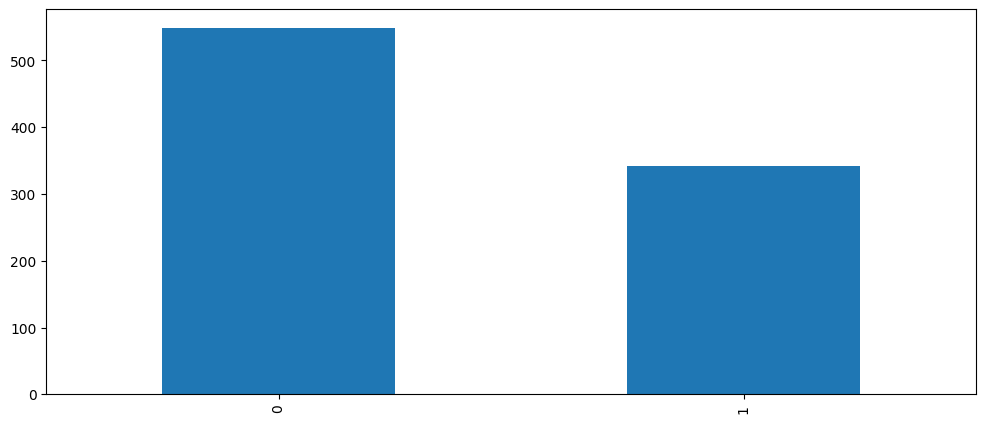

In [35]:
# Pandas plotting - .plot() function in pandas.
df['Survived'].value_counts().plot(kind='bar')


In [36]:
a1 = df['Survived'].value_counts()

In [37]:
# to set the default values for the graphs
plt.rcParams['figure.figsize']=[12,5]

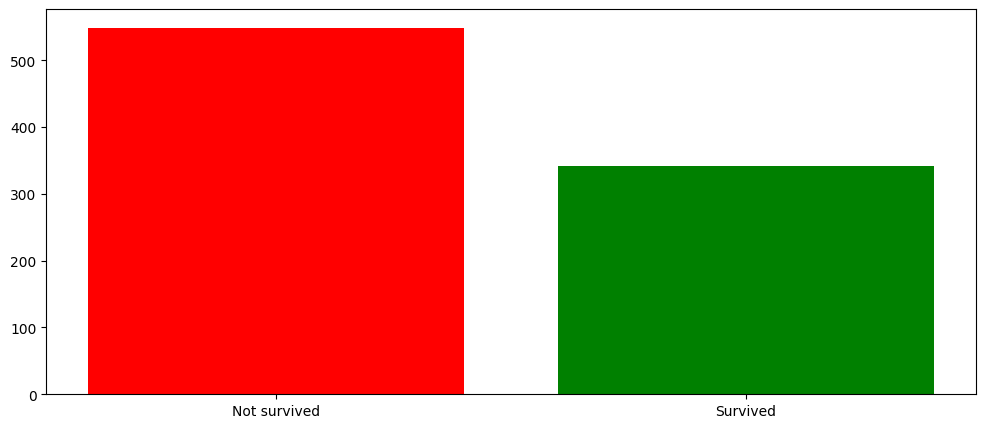

In [38]:
labels = ['Not survived','Survived']
plt.bar(labels, a1.values, color=['Red','Green'])
plt.show()

<ipython-input-42-e0edc980c5aa>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(x='Survived', data=df).set(title="Survived vs not-survived", xlabel="Survived or not survived",


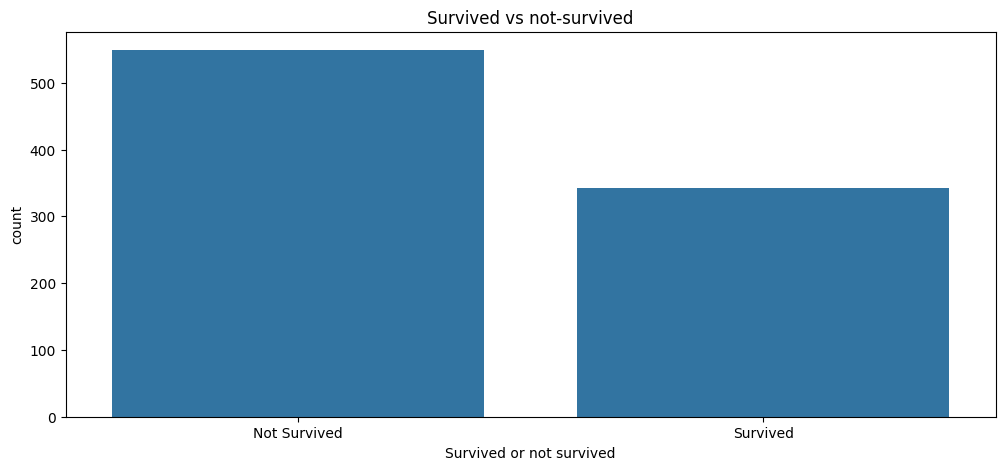

In [42]:
# Seaborn based plotting

sns.countplot(x='Survived', data=df).set(title="Survived vs not-survived", xlabel="Survived or not survived",
                                         xticklabels=['Not Survived','Survived'])# x means horizontal bar
plt.show()

In [40]:
df['Pclass'].value_counts()
a=df['Pclass'].value_counts()

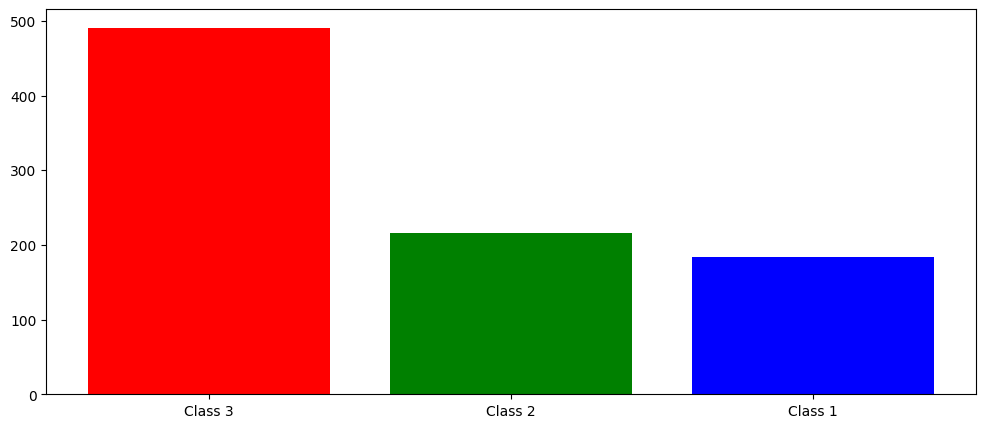

In [47]:
labels1=['Class 3','Class 2','Class 1']
plt.bar(labels1, a.values, color=['r','g','b'])
plt.show()

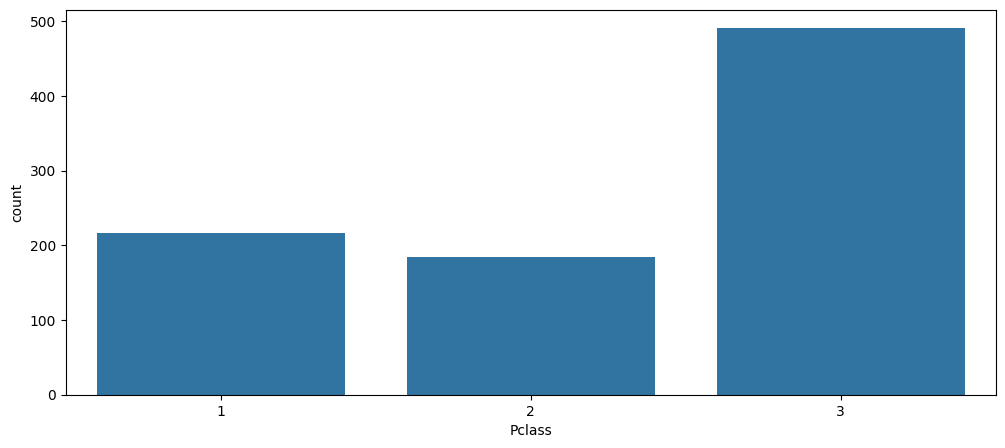

In [44]:
# seaborn plotting

sns.countplot(x='Pclass' ,data= df)
plt.show()

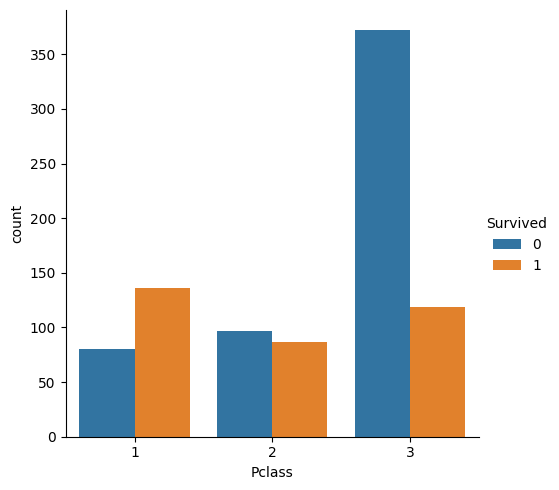

In [46]:
sns.catplot(x='Pclass', data=df, kind='count', hue='Survived')# hue gives the values according to the survived along with the  Pclass.
plt.show()

In [48]:
# majority of the people are in class 3.
# In passenger class 3 the survival rate is low as compared to the passenger class 2
# In passenger class 1 the survival rate is high.
# Like people who traveled in 1st class were given the preference for the evacuation.


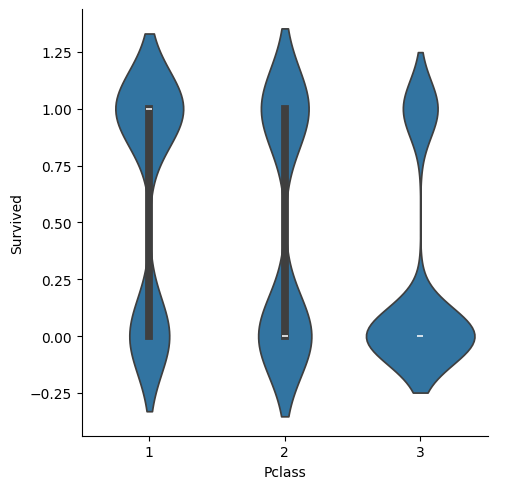

In [49]:
# violin plot
sns.catplot(x='Pclass', data=df, kind='violin', y='Survived')# hue gives the values according to the survived along with the  Pclass.
plt.show()

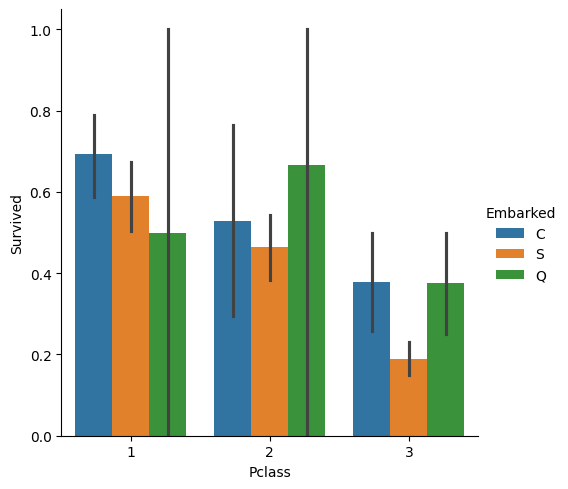

In [53]:
sns.catplot(x='Pclass', data=df, kind='bar', y='Survived', hue='Embarked')# hue gives the values according to the survived along with the  Pclass.
plt.show()

# the lines are error bars
# range of values with the average value.

In [50]:
# Prefernce is matplotlib
# within one line - then use seaborn

In [51]:
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
367,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,28.0,0,0,2626,7.2292,C
389,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,C


In [52]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [54]:
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
133,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0,S
228,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0,S


In [55]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

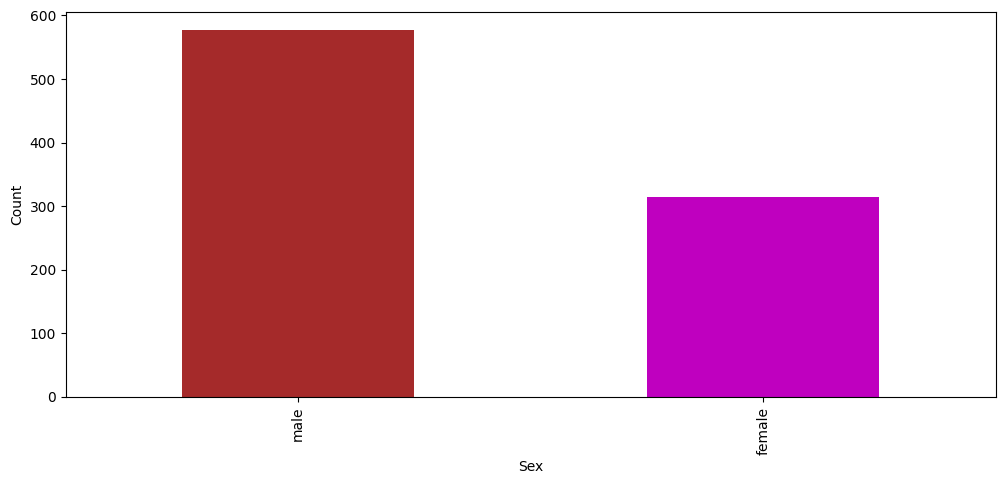

In [61]:
# matplotlib plotting
df['Sex'].value_counts().plot(kind='bar', color=['brown','m'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

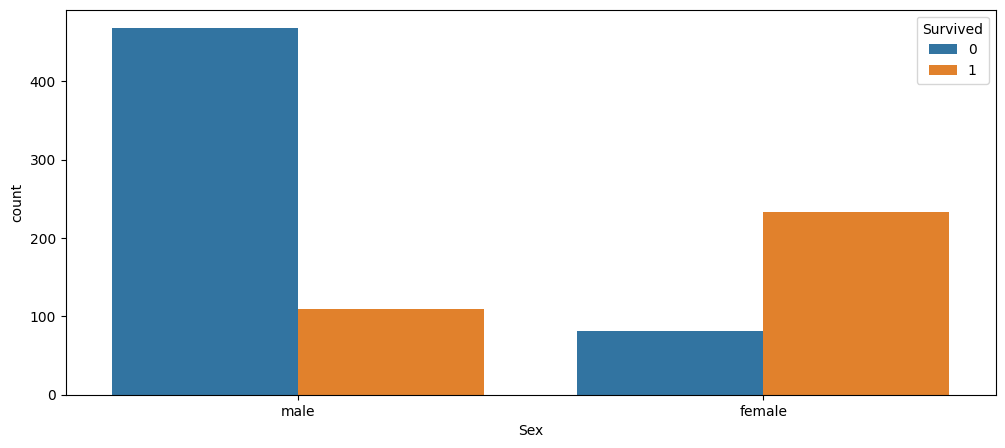

In [64]:
# sns plotting

sns.countplot(x='Sex', data=df, hue='Survived')

In [65]:
# analysis we can get from this is female have more chances of survival than males.
# so female have more chances of survival.

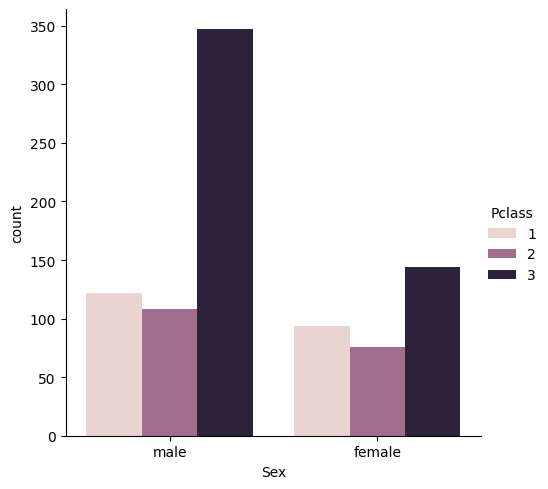

In [69]:
# sns catplot
sns.catplot(x='Sex' , data=df, hue='Pclass' , kind='count')

**Overall we can conclude that :**

- Only 38% of people survived.(Like out of 890 the 342 people survived)
- People in class PClass=1 have more chances of survival, then P3 and P2.
- Survival rate in P3 was very very less.
- Female passengers has more chances of survival than male passengers.
- People from Chebourg had relativley higher survival rate than Southhampton and Queinston.

In [73]:
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
130,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,C
728,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,S


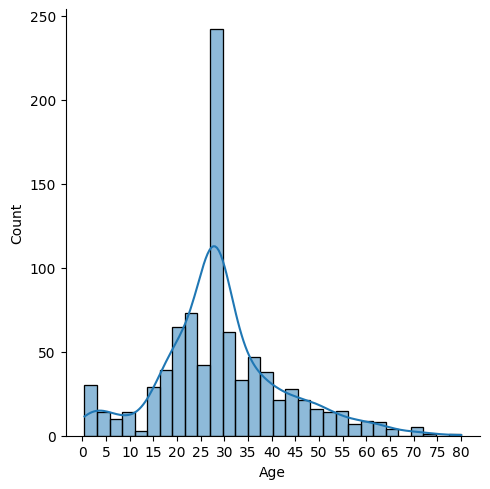

In [83]:
# age is the numerical quantity then we will use the describe function

df['Age'].describe()

# we will use the displot for the age

sns.displot(df['Age'], kde=True).set(xticks=np.arange(0,85,5))
# kde is kernel density estimator.
# by which we can check the areas where the density is more.

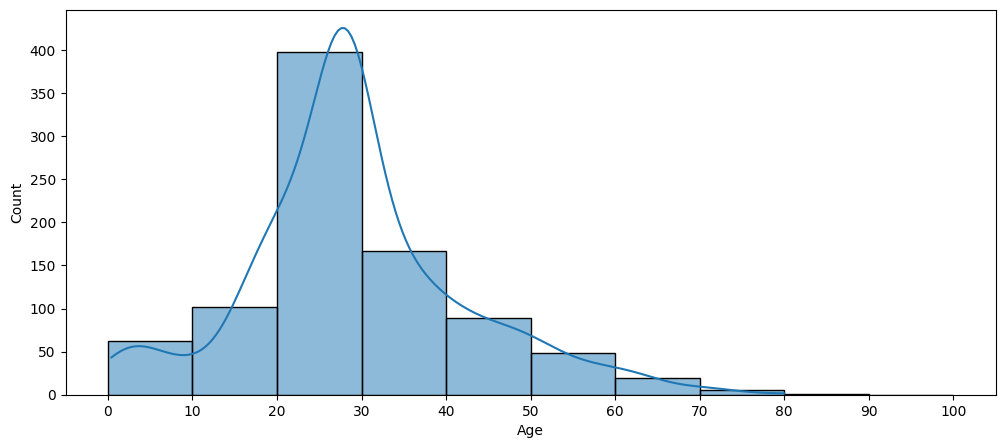

In [89]:
sns.histplot(df['Age'], kde=True, bins=np.arange(0,110,10))
plt.xticks(np.arange(0,110,10))
plt.show()

In [90]:
# majority of the people are around 20-40 - young age people.

(array([ 62., 102., 397., 167.,  89.,  48.,  19.,   6.,   1.,   0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

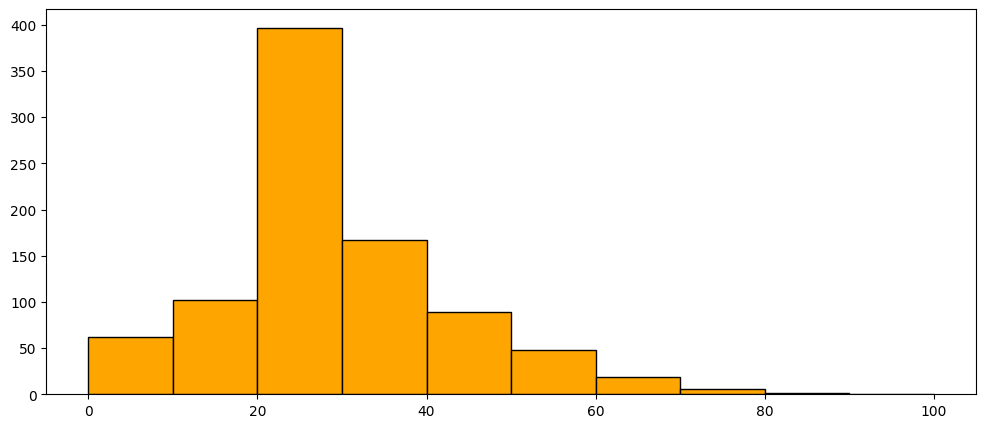

In [103]:
# Matplotlib plotting

plt.hist(df['Age'], bins=np.arange(0,110,10), color='Orange', edgecolor="k")

# with the matplotlib we can see the count between the age ranges.

In [104]:
# we can say that the majority of the people having age 15-40.